Mini-Projet 1 : Clustering des Passagers du Titanic
Objectif : Regrouper les passagers du Titanic en clusters pour identifier des groupes distincts en fonction de leurs caractéristiques.

Tâches :
Charger le jeu de données Titanic et effectuer une exploration des données. V
Sélectionner les caractéristiques pertinentes pour le clustering. V
Effectuer le clustering en utilisant K-Means ou un autre algorithme de votre choix. V
Attribuer des noms/étiquettes aux clusters. X
Analyser les statistiques des clusters pour comprendre les caractéristiques spécifiques de chaque groupe. V
Visualiser les clusters en utilisant des graphiques en deux dimensions.
Interpréter les résultats et discuter de ce que les clusters révèlent sur les passagers du Titanic.


In [1]:
# pre-requiq
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [2]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [3]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'embark_town']]
titanic.dropna(axis=0, inplace=True) # données manque
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
# replacer par valeur
titanic.head()

survived  pclass  sex   age  embark_town
0         0       3    0  22.0  Southampton
1         1       1    1  38.0    Cherbourg
2         1       3    1  26.0  Southampton
3         1       1    1  35.0  Southampton
4         0       3    0  35.0  Southampton

In [4]:
X=titanic.copy()
X=pd.get_dummies(X, columns=['embark_town']) # or 
#titanic['embark_town'].replace(['Southampton', 'Cherbourg','Queenstown'], [0, 1, 2], inplace=True)
X.head()

survived  pclass  sex   age  embark_town_Cherbourg  embark_town_Queenstown  \
0         0       3    0  22.0                  False                   False   
1         1       1    1  38.0                   True                   False   
2         1       3    1  26.0                  False                   False   
3         1       1    1  35.0                  False                   False   
4         0       3    0  35.0                  False                   False   

   embark_town_Southampton  
0                     True  
1                    False  
2                     True  
3                     True  
4                     True

In [5]:
X_train, X_test = train_test_split(X, test_size=0.20, random_state=11)
print(X_train.shape, X_test.shape)

(569, 7) (143, 7)


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


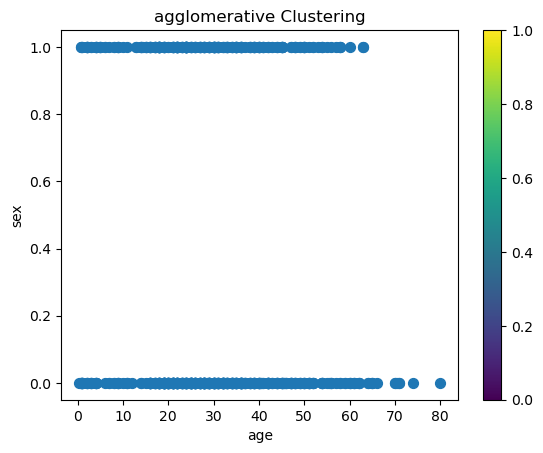

In [6]:
kmeans = KMeans(n_clusters=2, random_state=42) 

kmeans.fit(X)
kmeans.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['age'],X['sex'] ,s=50)
ax.set_title('agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('sex')
plt.colorbar(scatter)

In [7]:
kmeans.inertia_

56994.17586812095

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation


In [9]:
data= sns.load_dataset('titanic')
data1 = data[['survived','pclass','age','sibsp','parch','fare','sex']]

data1['sex'].replace(['male', 'female'], [0, 1], inplace=True)
data2=data1.dropna(axis=0).reset_index(drop=True)

C:\Users\Elion\AppData\Local\Temp\ipykernel_4556\291388411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sex'].replace(['male', 'female'], [0, 1], inplace=True)


In [10]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)



In [11]:
clust_labels1 = doAgglomerative(data2, 5)
agglomerative = pd.DataFrame(clust_labels1)
data2.insert((data2.shape[1]),'agglomerative',agglomerative)

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


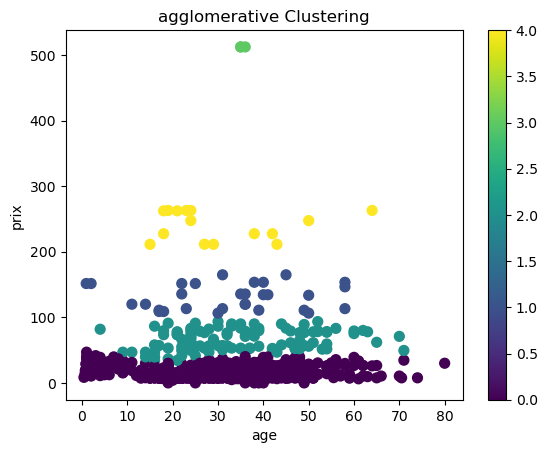

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['age'],data2['fare'],c=agglomerative[0],s=50)
ax.set_title('agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('prix')
plt.colorbar(scatter)

In [13]:
data2=data1.dropna(axis=0).reset_index(drop=True)

In [14]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data2, 5)
kmeans = pd.DataFrame(clust_labels)
data2.insert((data2.shape[1]),'kmeans',kmeans)

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [15]:
data2.groupby('kmeans').mean()

survived    pclass        age     sibsp     parch        fare  \
kmeans                                                                  
0       0.335106  2.515957  28.417110  0.437943  0.381206   15.684034   
1       0.733333  1.000000  32.430667  0.600000  0.866667  131.183883   
2       1.000000  1.000000  35.333333  0.000000  0.333333  512.329200   
3       0.733333  1.000000  30.333333  1.000000  1.333333  239.991940   
4       0.637255  1.274510  35.725490  0.843137  0.450980   67.193180   

             sex  
kmeans            
0       0.320922  
1       0.633333  
2       0.333333  
3       0.733333  
4       0.480392

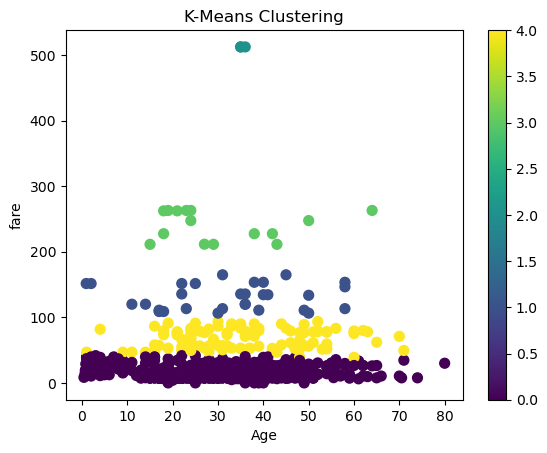

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['age'],data2['fare'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('fare')
plt.colorbar(scatter)

In [17]:
data2=data1.dropna(axis=0).reset_index(drop=True)
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(data2)
affinity = pd.DataFrame(clust_labels2)
data2.insert((data2.shape[1]),'affinity',affinity)
data2.groupby('affinity').mean()

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


survived    pclass        age     sibsp     parch        fare  \
affinity                                                                  
0         0.769231  2.884615   3.823846  0.961538  1.076923   16.396150   
1         0.352941  2.588235   7.823529  2.882353  1.529412   40.442406   
2         0.423077  2.653846   5.493462  2.500000  1.653846   28.693750   
3         0.279661  2.898305  19.228814  0.161017  0.076271    8.537007   
4         0.333333  1.000000  74.000000  0.000000  0.000000   38.052800   
5         0.416667  1.833333  41.777778  0.388889  1.083333   26.796528   
6         0.500000  1.000000   1.460000  1.000000  2.000000  151.550000   
7         0.500000  1.000000  57.000000  0.500000  2.500000  255.260400   
8         0.512195  2.121951  30.146341  0.756098  0.512195   24.252946   
9         0.833333  1.000000  37.333333  0.500000  0.166667  134.924983   
10        0.846154  1.384615  21.769231  0.846154  0.692308   56.075323   
11        0.900000  1.000000  23.300000  0.800000  1.000000  114.165830   
12        0.250000  1.875000  44.875000  0.500000  1.875000   38.447913   
13        0.250000  1.200000  57.450000  0.150000  0.200000   28.863955   
14        0.705882  1.000000  54.294118  0.764706  0.352941   79.807847   
15        0.142857  2.734694  41.581633  0.122449  0.061224    8.367431   
16        0.583333  1.250000  19.416667  0.250000  0.416667   79.670133   
17        0.533333  1.066667  49.333333  0.733333  0.400000   56.279460   
18        0.750000  1.000000  39.625000  0.250000  0.875000  154.967713   
19        0.236364  2.736364  26.609091  0.190909  0.090909   10.010074   
20        0.647059  2.294118  18.411765  0.764706  0.823529   22.580388   
21        0.600000  1.200000  30.200000  0.700000  0.200000   72.635420   
22        0.250000  1.000000  49.000000  0.750000  1.000000  110.366650   
23        0.316667  2.533333  33.516667  0.183333  0.116667   11.457775   
24        0.857143  1.000000  30.285714  0.142857  0.571429  218.298214   
25        1.000000  1.000000  35.333333  0.000000  0.333333  512.329200   
26        0.666667  1.000000  21.500000  2.166667  1.833333  260.211800   
27        0.846154  1.000000  34.384615  0.769231  0.153846   86.617946   
28        0.200000  2.440000  57.440000  0.000000  0.000000   10.247168   
29        0.642857  1.428571  32.785714  0.571429  0.071429   53.769043   
30        0.500000  1.625000  27.843750  0.562500  0.687500   34.030212   

               sex  
affinity            
0         0.538462  
1         0.235294  
2         0.538462  
3         0.305085  
4         0.000000  
5         0.388889  
6         0.500000  
7         0.500000  
8         0.463415  
9         0.666667  
10        0.615385  
11        0.600000  
12        0.625000  
13        0.150000  
14        0.529412  
15        0.163265  
16        0.500000  
17        0.333333  
18        0.875000  
19        0.245455  
20        0.705882  
21        0.500000  
22        0.250000  
23        0.283333  
24        0.857143  
25        0.333333  
26        0.666667  
27        0.692308  
28        0.200000  
29        0.357143  
30        0.312500

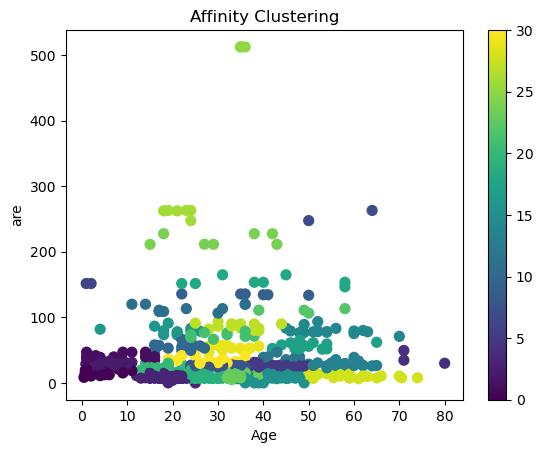

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['age'],data2['fare'],c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('are')
plt.colorbar(scatter)

In [19]:
from sklearn.mixture import GaussianMixture 

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


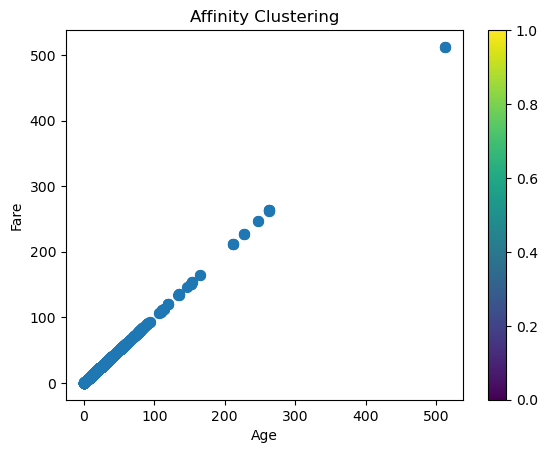

In [20]:
data2=data1.dropna(axis=0).reset_index(drop=True)
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(data2,5)
gmm = pd.DataFrame(clust_labels3)
data2.insert((data2.shape[1]),'Guassian',gmm)
data2.groupby('Guassian').mean()
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2, data2,s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


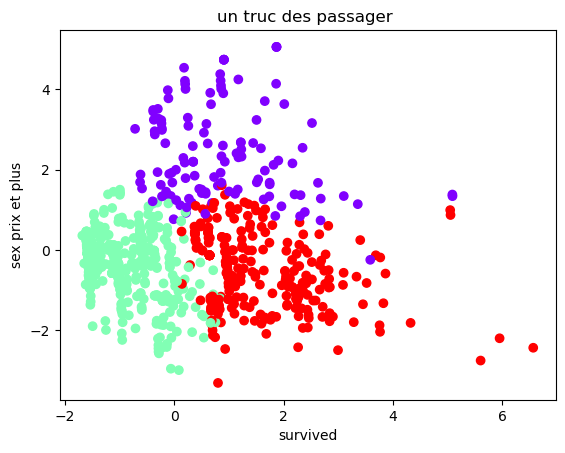

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass','sex', 'age', 'fare', 'embarked', 'sibsp', 'parch', 'survived']

#selected_features = ['pclass','sex', 'age', 'survived', 'sibsp']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())


scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])



kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('survived')
plt.ylabel('sex prix et plus')
plt.title('un truc des passager ')
plt.show()

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                pclass       sex        age       fare  embarked     sibsp  \
Cluster Name                                                                 
Cluster A     1.438017  0.710744  34.661432  72.316014  0.564977  0.425620   
Cluster B     2.599214  0.100196  30.965020  14.127846  0.288802  0.188605   
Cluster C     2.757143  0.650000  16.518945  28.588573  0.278571  1.907143   

                 parch  survived  
Cluster Name                      
Cluster A     0.367769  0.884298  
Cluster B     0.053045  0.113949  
Cluster C     1.600000  0.500000  


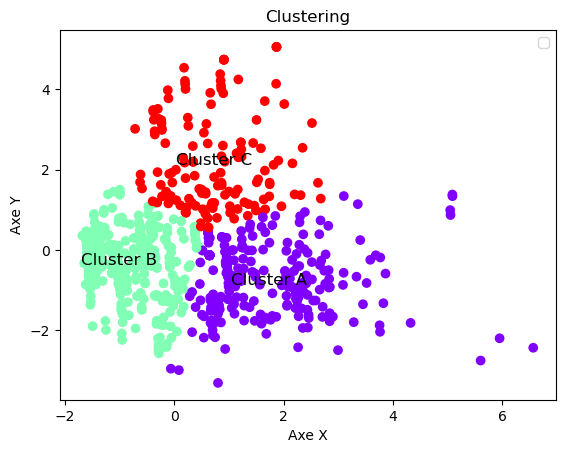

In [22]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

titanic_data['Cluster'] = cluster_labels
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C'
}
titanic_data['Cluster Name'] = titanic_data['Cluster'].map(cluster_names)

cluster_stats = titanic_data.groupby('Cluster Name')[selected_features].mean()
print(cluster_stats)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.title('Clustering')

# Ajouter des annotations pour les noms de clusters
for cluster_id, cluster_name in cluster_names.items():
    cluster_points = reduced_data[cluster_labels == cluster_id]
    cluster_center = cluster_points.mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], cluster_name, fontsize=12, ha='center', va='center')
    
plt.legend()
plt.show()


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                pclass       sex        age       fare     parch  survived
Cluster Name                                                              
Cluster A     2.628959  0.823529  19.953559  22.965574  1.036199  0.696833
Cluster B     1.101010  0.530303  39.750939  85.826137  0.328283  0.737374
Cluster C     2.665254  0.057203  30.045533  14.035979  0.097458  0.088983


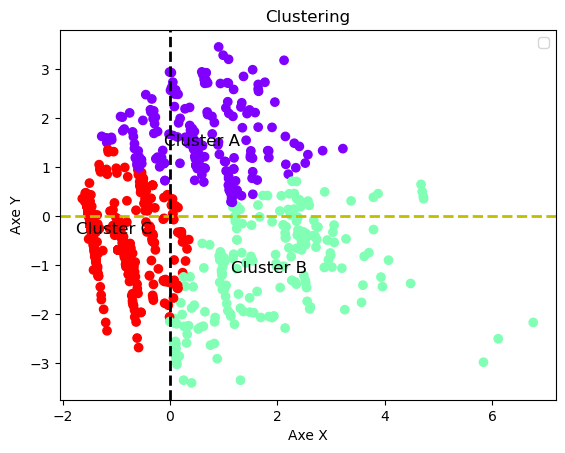

In [23]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass','sex', 'age', 'fare', 'parch', 'survived']

#selected_features = ['pclass','sex', 'age', 'survived', 'sibsp']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

titanic_data['Cluster'] = cluster_labels
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C'
}
titanic_data['Cluster Name'] = titanic_data['Cluster'].map(cluster_names)

cluster_stats = titanic_data.groupby('Cluster Name')[selected_features].mean()
print(cluster_stats)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.title('Clustering')
plt.axhline(y=0, color='y', linestyle='--', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
# Ajouter des annotations pour les noms de clusters
for cluster_id, cluster_name in cluster_names.items():
    cluster_points = reduced_data[cluster_labels == cluster_id]
    cluster_center = cluster_points.mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], cluster_name, fontsize=12, ha='center', va='center')
    
plt.legend()
plt.show()

# ecart type

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                pclass       sex        age       fare     parch  survived
Cluster Name                                                              
Cluster A     2.658798  0.042918  30.040754  14.389250  0.109442  0.077253
Cluster B     1.078125  0.520833  39.537010  88.901238  0.354167  0.739583
Cluster C     2.622318  0.832618  20.909084  21.113824  0.948498  0.703863


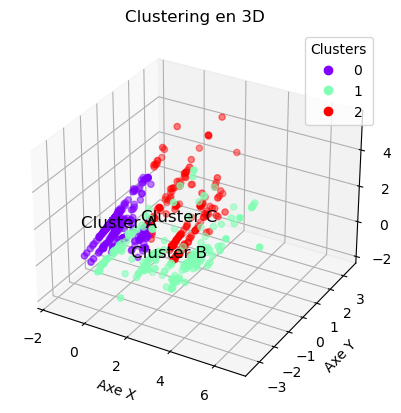

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Charger les données Titanic
titanic_data = sns.load_dataset('titanic')

# Prétraitement des données
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduction de dimension à 3D avec PCA
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

# Clustering avec K-Means en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data_3d)

# Ajouter les labels de cluster au DataFrame
titanic_data['Cluster'] = cluster_labels
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C'
}
titanic_data['Cluster Name'] = titanic_data['Cluster'].map(cluster_names)

# Afficher les statistiques des clusters
cluster_stats = titanic_data.groupby('Cluster Name')[selected_features].mean()
print(cluster_stats)

# Afficher le graphique en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=cluster_labels, cmap='rainbow')
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')
ax.set_title('Clustering en 3D')

# Ajouter des annotations pour les noms de clusters
for cluster_id, cluster_name in cluster_names.items():
    cluster_points = reduced_data_3d[cluster_labels == cluster_id]
    cluster_center = cluster_points.mean(axis=0)
    ax.text(cluster_center[0], cluster_center[1], cluster_center[2], cluster_name, fontsize=12, ha='center', va='center')

plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


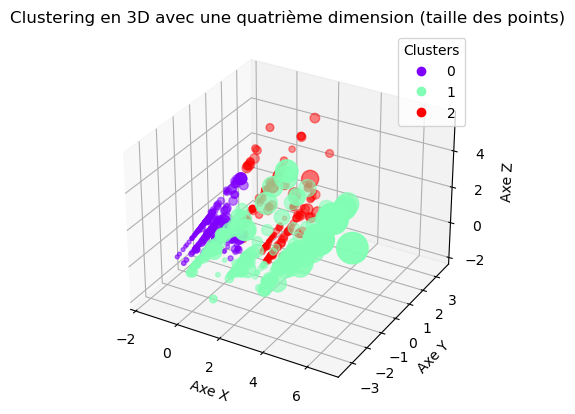

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Charger les données Titanic
titanic_data = sns.load_dataset('titanic')

# Prétraitement des données
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduction de dimension à 3D avec PCA
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

# Ajouter une quatrième dimension avec la taille des points (par exemple, basée sur la colonne 'fare')
titanic_data['point_size'] = titanic_data['fare']

# Clustering avec K-Means en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data_3d)

# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Afficher les points avec une quatrième dimension basée sur la taille des points
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=cluster_labels, cmap='rainbow', s=titanic_data['point_size'])

ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')
ax.set_title('Clustering en 3D avec une quatrième dimension (taille des points)')

# Ajouter une légende pour la couleur des clusters
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


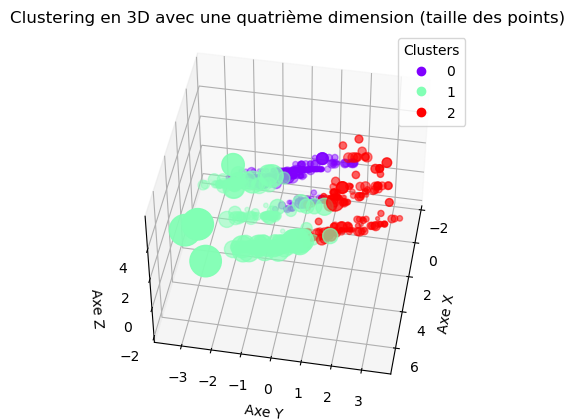

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Charger les données Titanic
titanic_data = sns.load_dataset('titanic')

# Prétraitement des données
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduction de dimension à 3D avec PCA
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

# Ajouter une quatrième dimension avec la taille des points (par exemple, basée sur la colonne 'fare')
titanic_data['point_size'] = titanic_data['fare']

# Clustering avec K-Means en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data_3d)

# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Afficher les points avec une quatrième dimension basée sur la taille des points
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=cluster_labels, cmap='rainbow', s=titanic_data['point_size'])

ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')
ax.set_title('Clustering en 3D avec une quatrième dimension (taille des points)')

# Ajouter une légende pour la couleur des clusters
plt.legend(*scatter.legend_elements(), title='Clusters')

# Activer l'interaction pour faire pivoter le graphique
ax.view_init(azim=10, elev=45)  # Réglez les angles d'azimut et d'élévation pour la vue initiale
plt.show()


In [27]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Charger les données Titanic
titanic_data = sns.load_dataset('titanic')

# Prétraitement des données
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduction de dimension à 3D avec PCA
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

# Ajouter une quatrième dimension avec la taille des points (par exemple, basée sur la colonne 'fare')
titanic_data['point_size'] = titanic_data['fare']

# Clustering avec K-Means en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data_3d)

# Créer un DataFrame avec les données réduites en 3D
reduced_df = pd.DataFrame(reduced_data_3d, columns=['X', 'Y', 'Z'])

# Ajouter les labels de cluster et la taille des points au DataFrame réduit
reduced_df['Cluster'] = cluster_labels
reduced_df['Point Size'] = titanic_data['point_size']

# Créer un graphique 3D interactif avec Plotly Express
fig = px.scatter_3d(reduced_df, x='X', y='Y', z='Z', color='Cluster', size='Point Size',
                    opacity=0.7, labels={'X': 'Axe X', 'Y': 'Axe Y', 'Z': 'Axe Z'},
                    title='Clustering en 3D avec Plotly')
fig.show()


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.mixture import GaussianMixture


In [29]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


titanic_data = sns.load_dataset('titanic')


titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])


pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

titanic_data['point_size'] = titanic_data['fare']

gmm = GaussianMixture(n_components=3, random_state=0)
cluster_labels = gmm.fit_predict(scaled_data)


reduced_df = pd.DataFrame(reduced_data_3d, columns=['X', 'Y', 'Z'])


reduced_df['Cluster'] = cluster_labels
reduced_df['Point Size'] = titanic_data['point_size']

fig = px.scatter_3d(reduced_df, x='X', y='Y', z='Z', color='Cluster', size='Point Size',
                    opacity=0.7, labels={'X': 'Axe X', 'Y': 'Axe Y', 'Z': 'Axe Z'},
                    title='Clustering en 3D avec Plotly (Gaussian Mixture)')
fig.show()


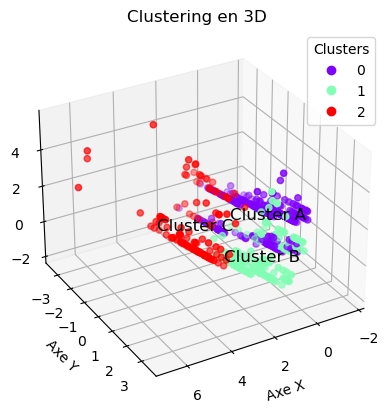

In [30]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


titanic_data = sns.load_dataset('titanic')


titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])


pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

titanic_data['point_size'] = titanic_data['fare']

gmm = GaussianMixture(n_components=3, random_state=0)
cluster_labels = gmm.fit_predict(scaled_data)


reduced_df = pd.DataFrame(reduced_data_3d, columns=['X', 'Y', 'Z'])


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=cluster_labels, cmap='rainbow')
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')
ax.set_title('Clustering en 3D')

for cluster_id, cluster_name in cluster_names.items():
    cluster_points = reduced_data_3d[cluster_labels == cluster_id]
    cluster_center = cluster_points.mean(axis=0)
    ax.text(cluster_center[0], cluster_center[1], cluster_center[2], cluster_name, fontsize=12, ha='center', va='center')

plt.legend(*scatter.legend_elements(), title='Clusters')
ax.view_init(azim=60, elev=30) 
plt.show()


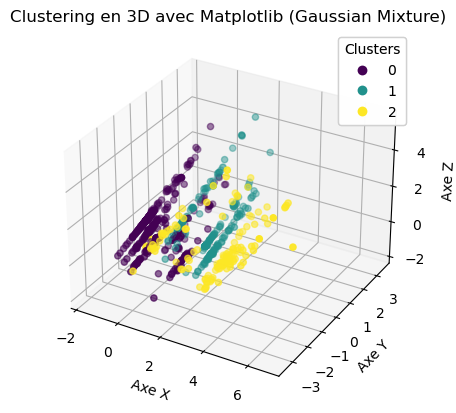

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

titanic_data = sns.load_dataset('titanic')

titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

gmm = GaussianMixture(n_components=3, random_state=0)
cluster_labels = gmm.fit_predict(scaled_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=cluster_labels, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')

ax.set_title('Clustering en 3D avec Matplotlib (Gaussian Mixture)')

plt.show()


In [32]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

# Charger les données Titanic
titanic_data = sns.load_dataset('titanic')

# Prétraitement des données
titanic_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
selected_features = ['pclass', 'sex', 'age', 'fare', 'parch', 'survived']
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduction de dimension à 3D avec PCA
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data_3d)


labels_true = titanic_data['survived']  


homogeneity = metrics.homogeneity_score(labels_true, cluster_labels)
completeness = metrics.completeness_score(labels_true, cluster_labels)
v_meusure = metrics.v_measure_score(labels_true, cluster_labels)


print(f'Homogénéité : {homogeneity}')
print(f'Complétude : {completeness}')
print(f'v meusure :{v_meusure}')

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Homogénéité : 0.362195118163734
Complétude : 0.23634712286366732
v meusure :0.2860408780717804


In [33]:
score_funcs = [
    ("V-measure", metrics.v_measure_score),
    ("Rand index", metrics.rand_score),
    ("ARI", metrics.adjusted_rand_score),
    ("MI", metrics.mutual_info_score),
    ("NMI", metrics.normalized_mutual_info_score),
    ("AMI", metrics.adjusted_mutual_info_score),
]

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

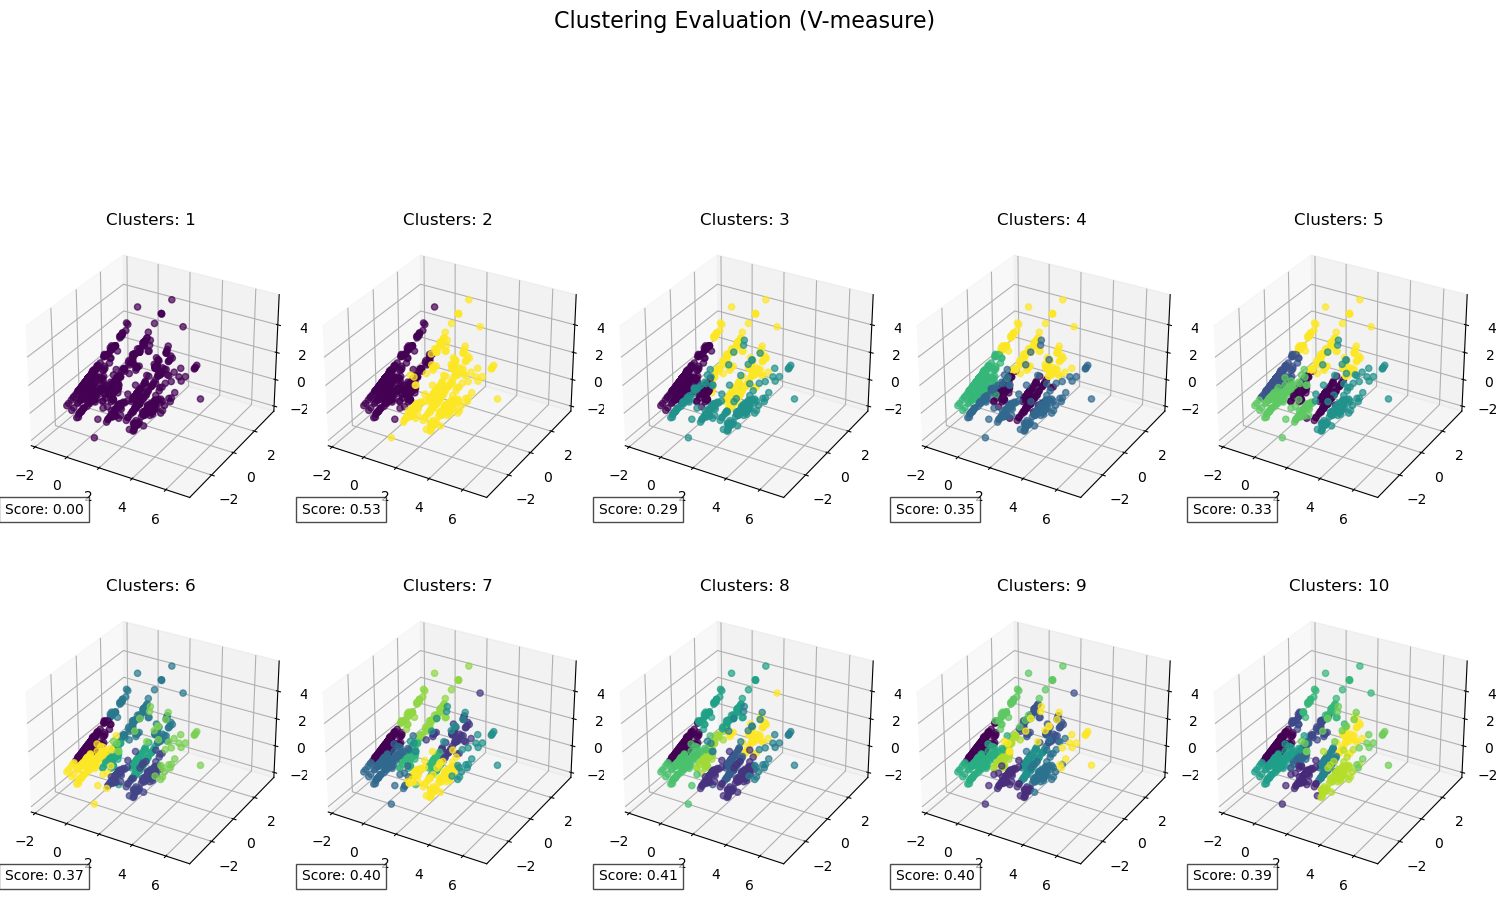

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

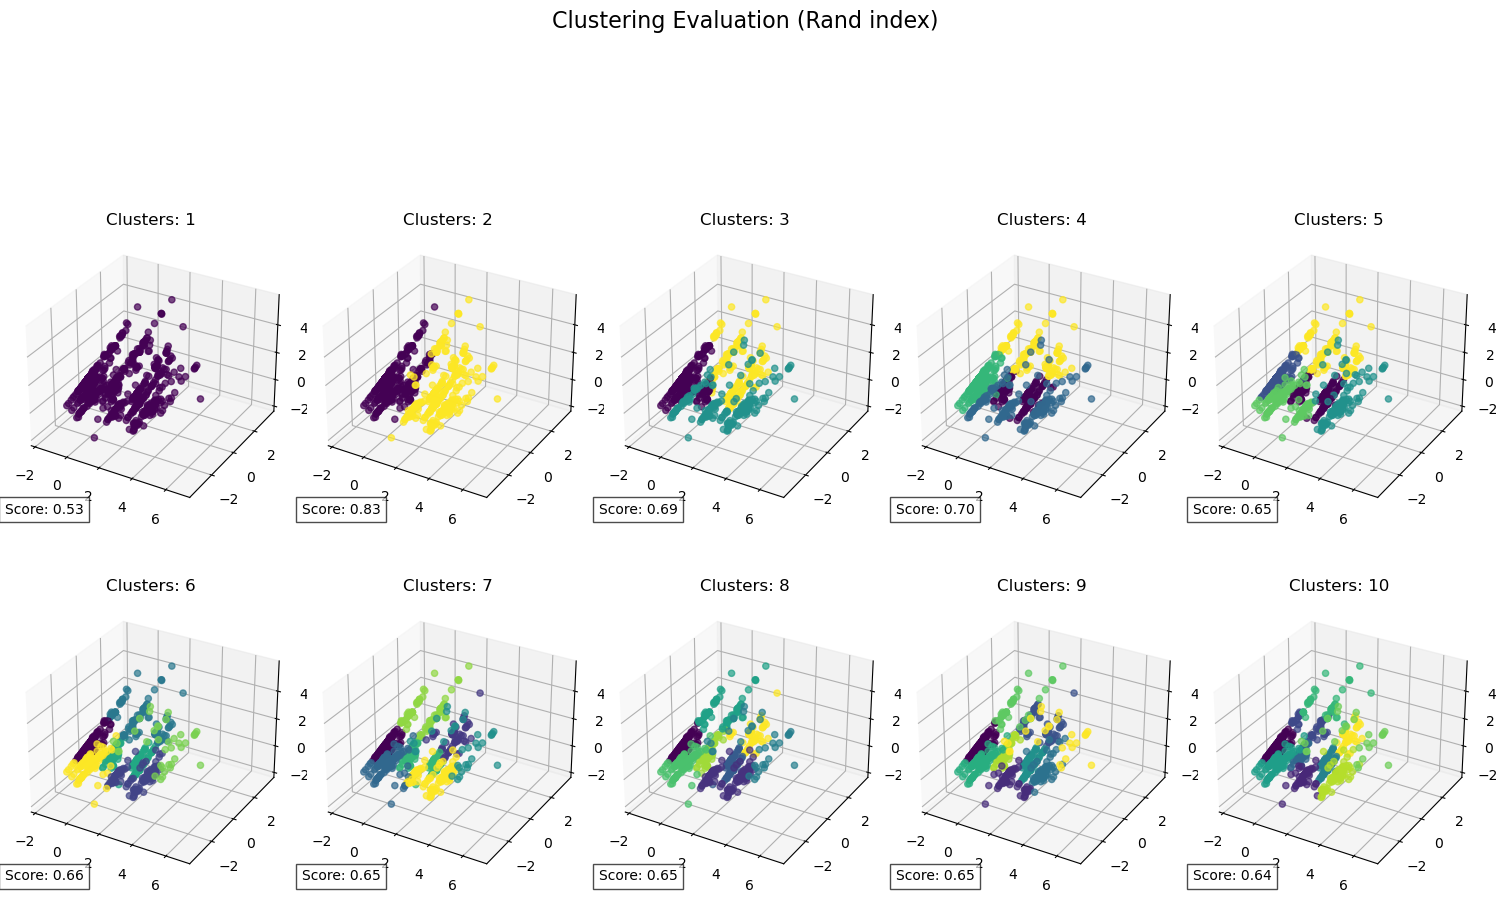

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

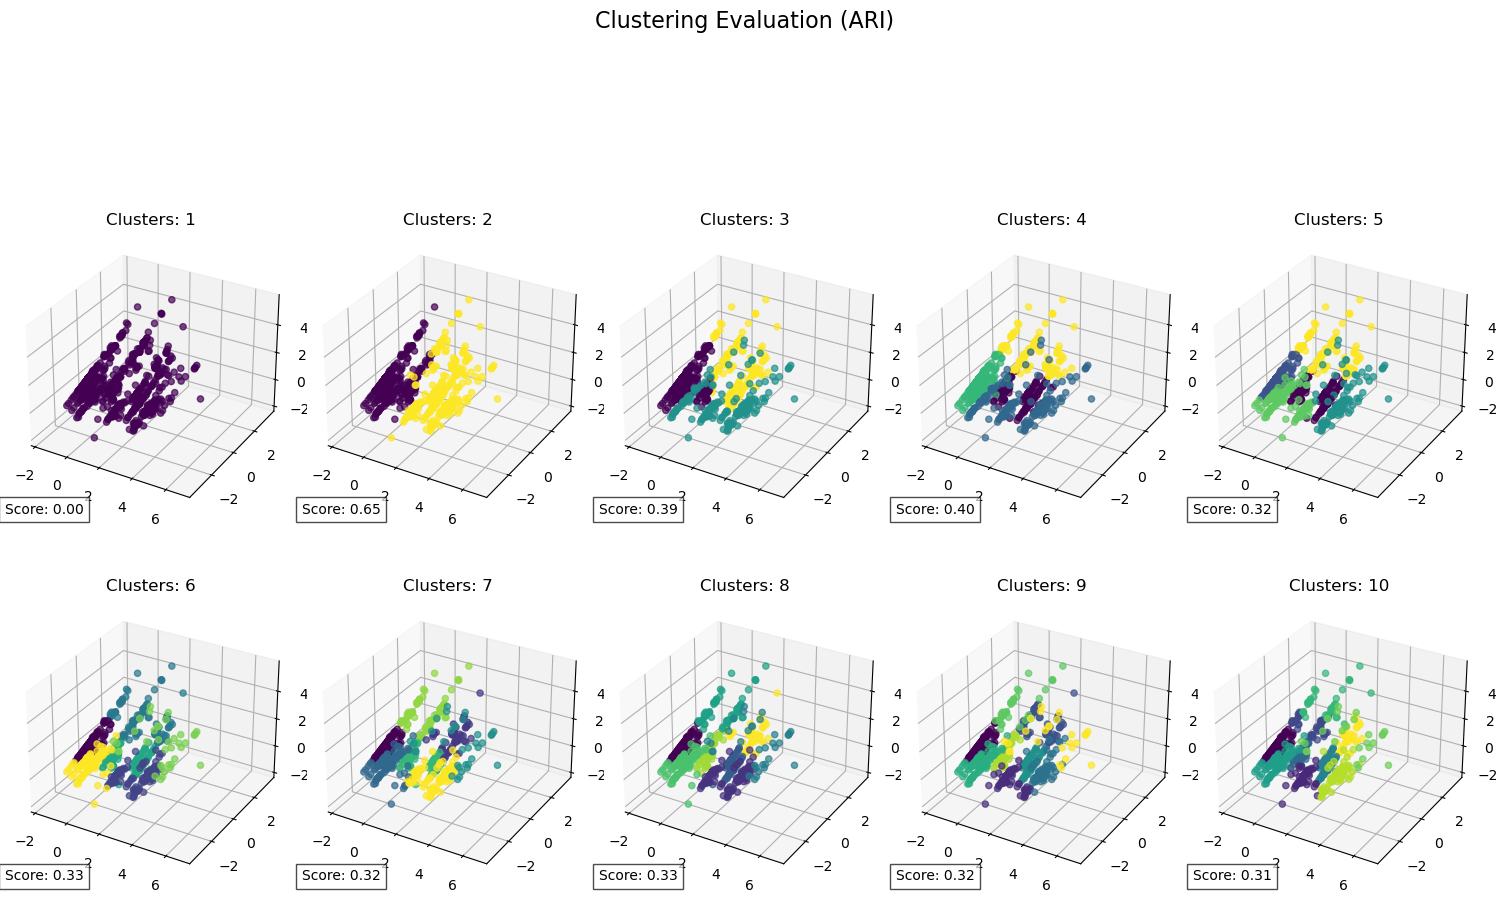

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

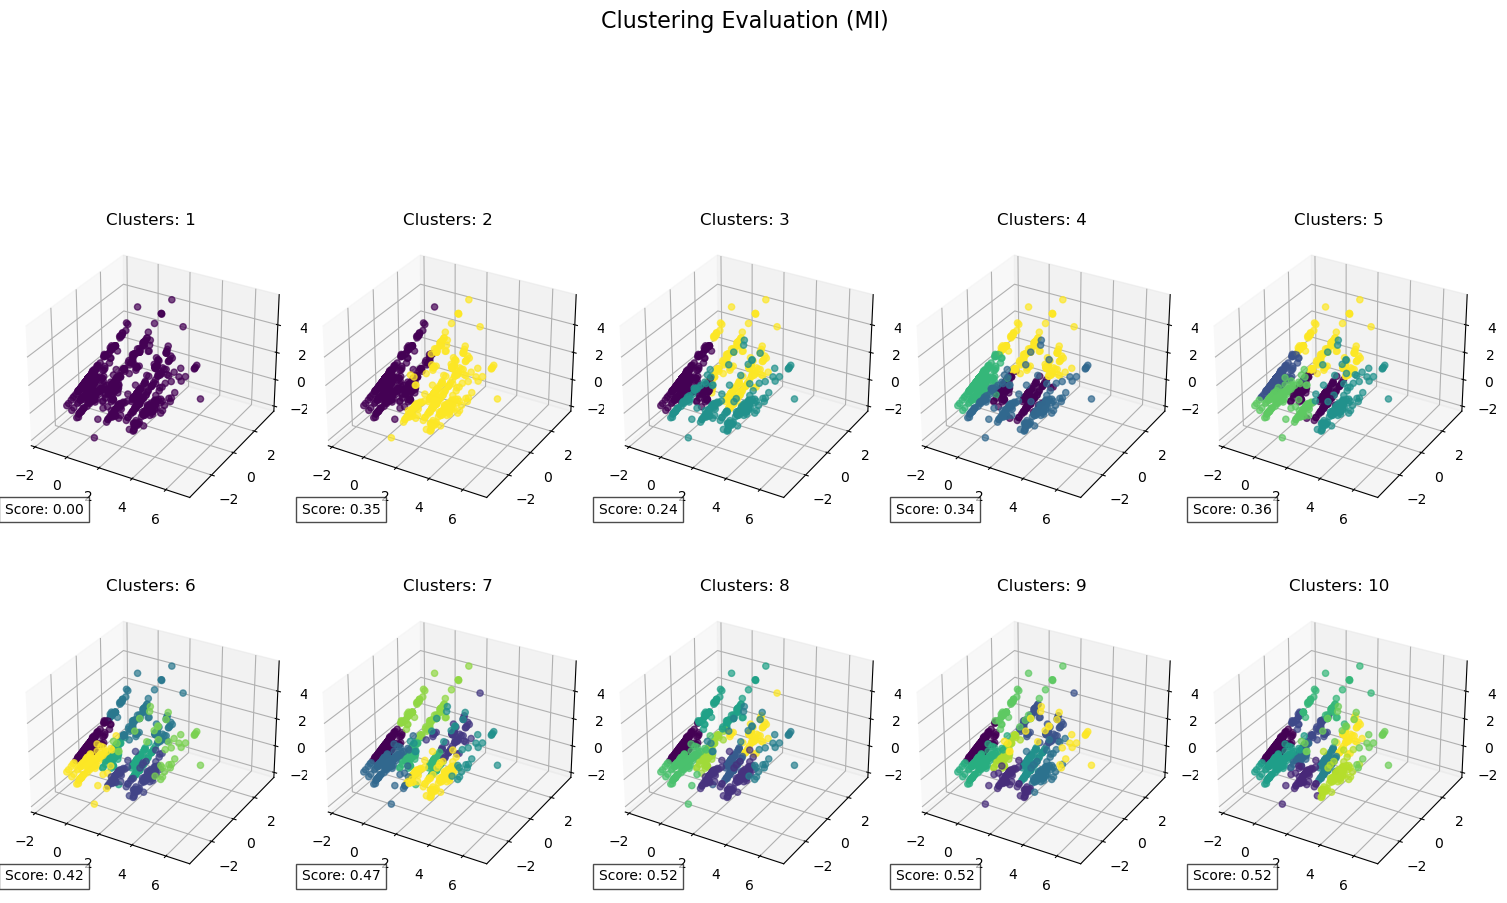

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

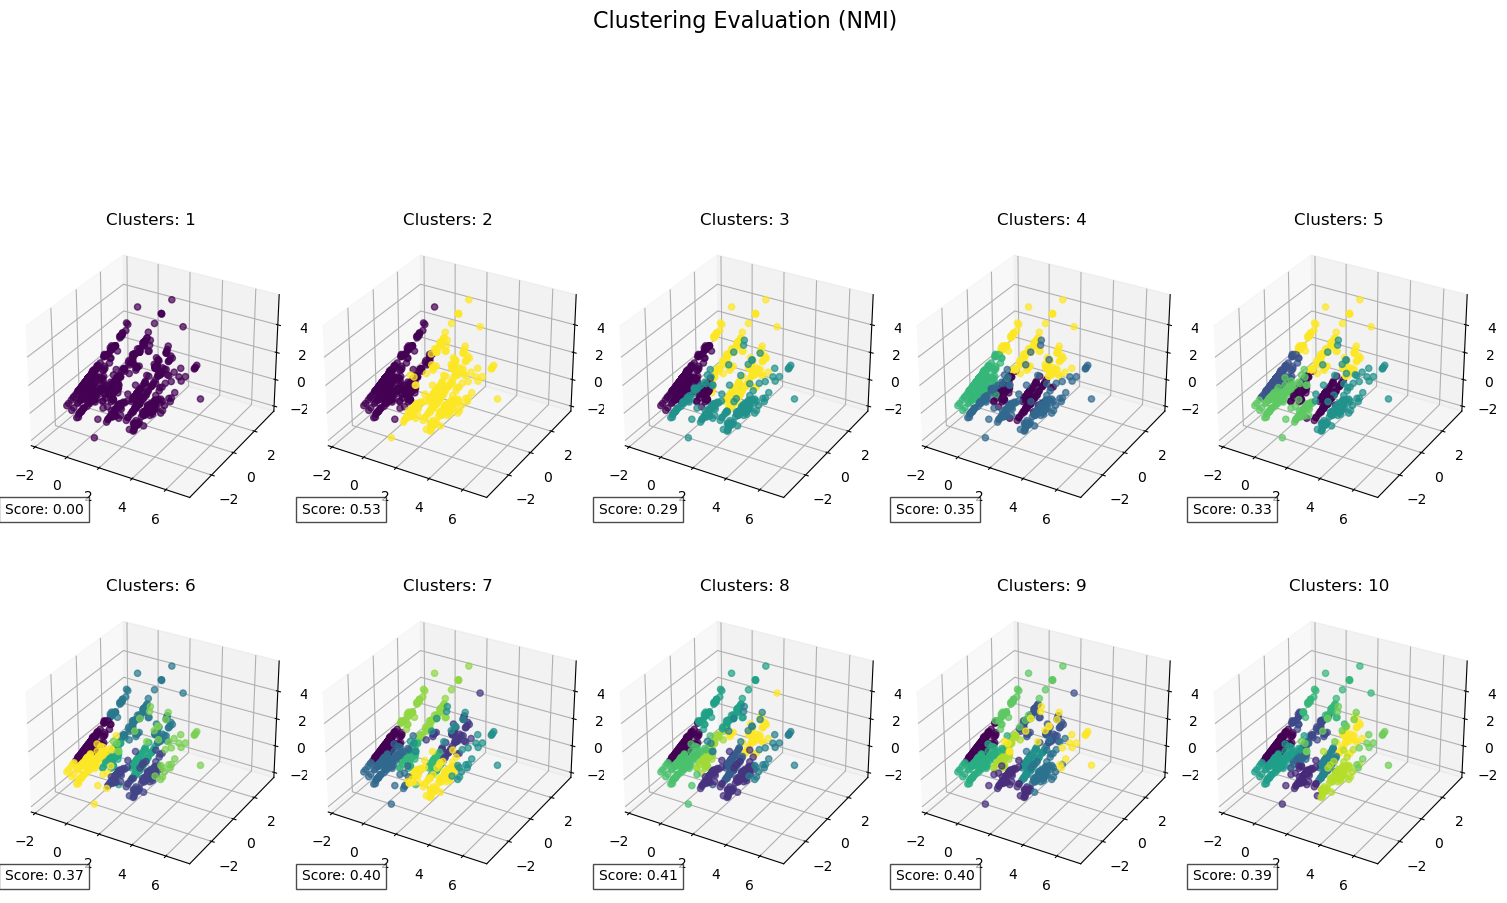

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

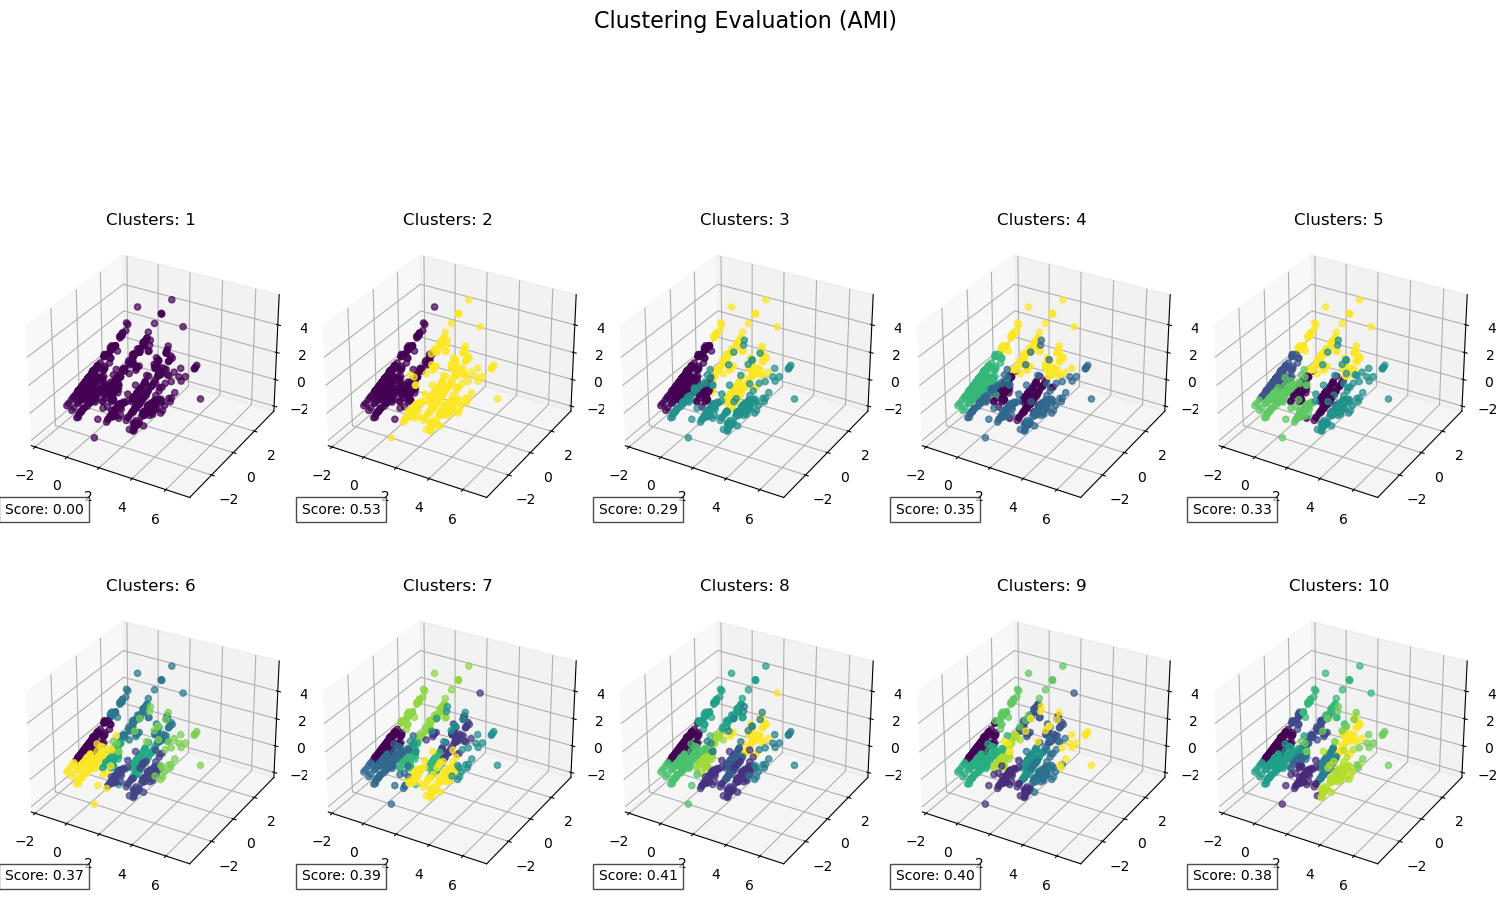

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créez une liste de nombres de clusters de 1 à 10
num_clusters = list(range(1, 11))

# Boucle pour chaque mesure de score
for score_name, score_func in score_funcs:
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(f'Clustering Evaluation ({score_name})', fontsize=16)
    
    for i, num_cluster in enumerate(num_clusters):
        ax = fig.add_subplot(2, 5, i + 1, projection='3d')
        ax.set_title(f'Clusters: {num_cluster}')
        
        kmeans = KMeans(n_clusters=num_cluster, random_state=0)
        cluster_labels = kmeans.fit_predict(reduced_data_3d)
        
        ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                   c=cluster_labels, cmap='viridis', s=20, alpha=0.7)
        
        score = score_func(labels_true, cluster_labels)
        
        ax.text(0.05, 0.95, 0.9, f'Score: {score:.2f}', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


{'V-measure': [], 'Rand index': [], 'ARI': [], 'MI': [], 'NMI': [], 'AMI': []}


c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Elion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

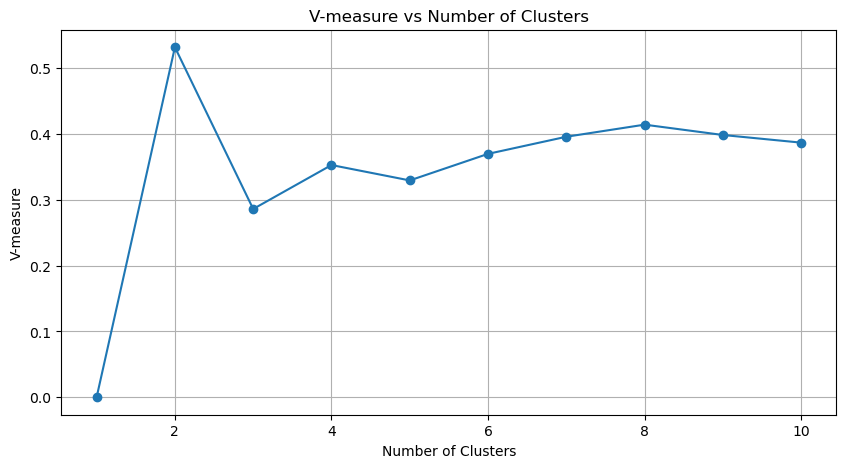

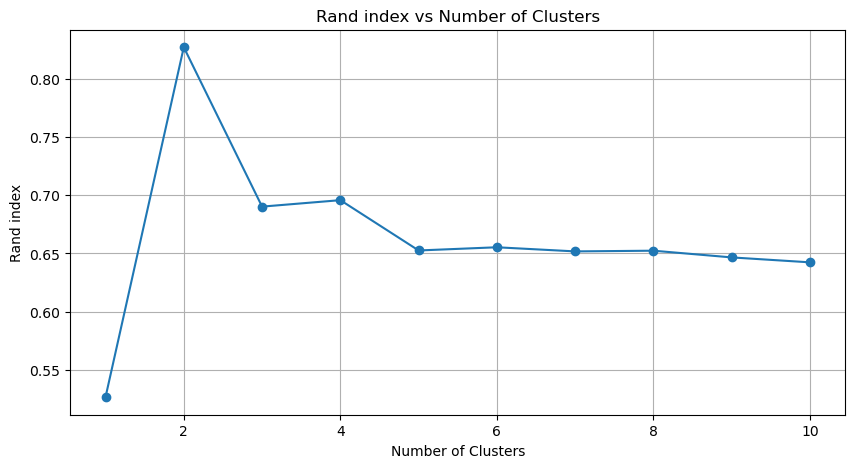

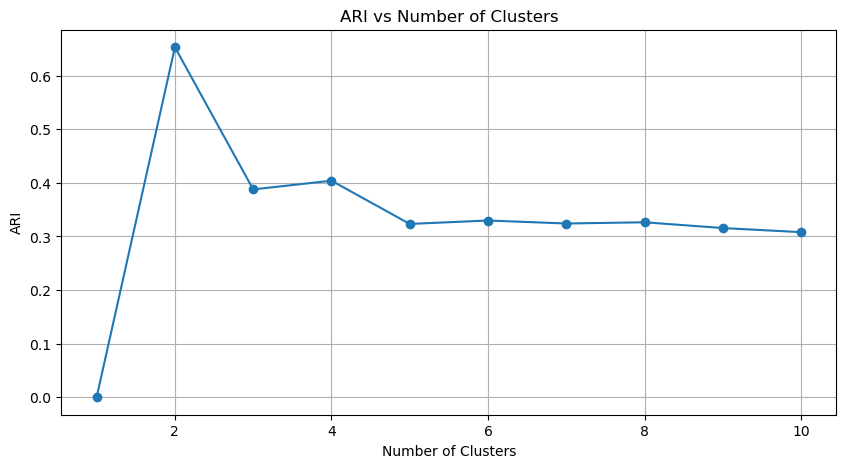

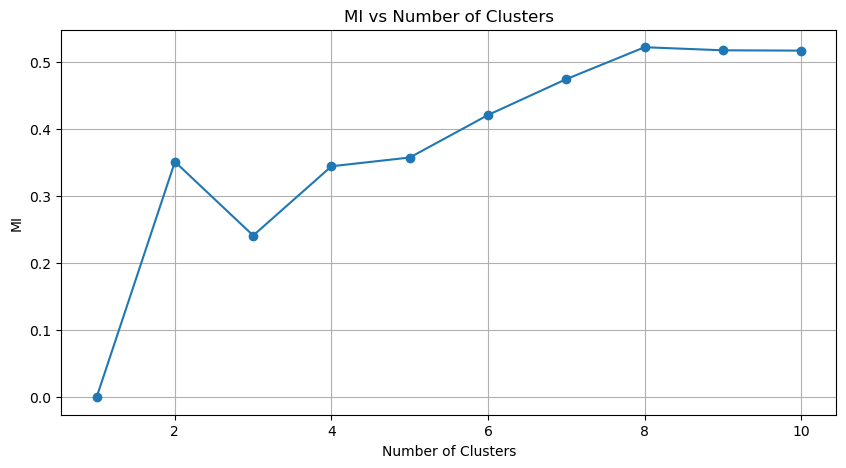

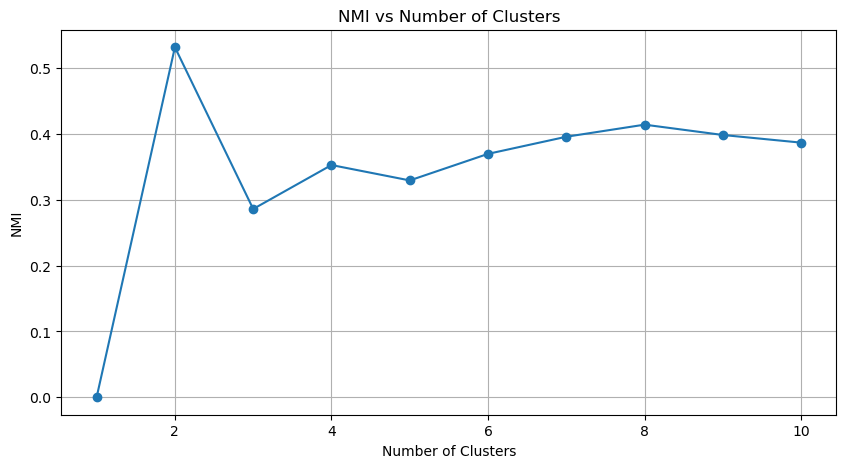

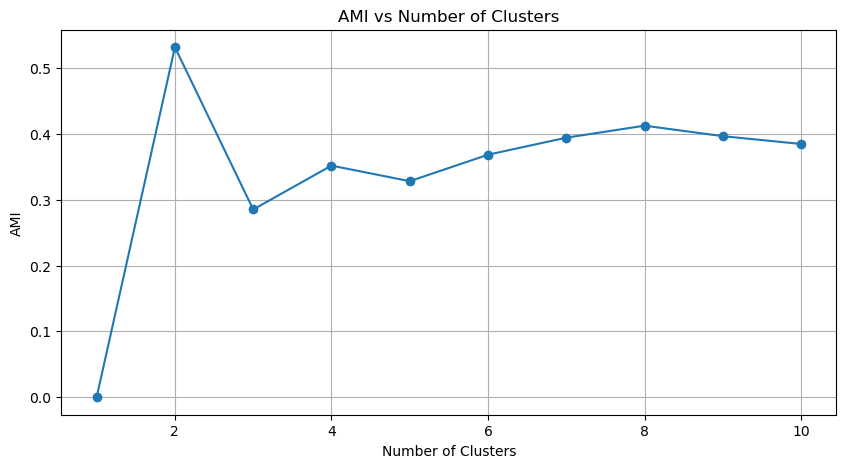

In [37]:
import plotly.graph_objects as go

# Créez une liste de nombres de clusters de 1 à 10
num_clusters = list(range(1, 11))

# Créez un dictionnaire pour stocker les scores pour chaque mesure
scores = {score_name: [] for score_name, _ in score_funcs}
print(scores)
# Boucle pour chaque mesure de score
for score_name, score_func in score_funcs:
    fig = go.Figure()
    fig.update_layout(
        title=f'Clustering Evaluation ({score_name})',
        scene=dict(
            xaxis_title='Component 1',
            yaxis_title='Component 2',
            zaxis_title='Component 3'
        )
    )

    for num_cluster in num_clusters:
        kmeans = KMeans(n_clusters=num_cluster, random_state=0)
        cluster_labels = kmeans.fit_predict(reduced_data_3d)

        # Calculer le score
        score = score_func(labels_true, cluster_labels)
        scores[score_name].append(score)

        # Ajoutez les points de données à la figure
        scatter = go.Scatter3d(
            x=reduced_data_3d[:, 0],
            y=reduced_data_3d[:, 1],
            z=reduced_data_3d[:, 2],
            mode='markers',
            marker=dict(size=5, opacity=0.7, color=cluster_labels),
            name=f'Clusters: {num_cluster}, Score: {score:.2f}'
        )
        fig.add_trace(scatter)

    fig.show()

# Afficher les scores pour chaque mesure
for score_name, score_list in scores.items():
    plt.figure(figsize=(10, 5))
    plt.plot(num_clusters, score_list, marker='o', linestyle='-')
    plt.title(f'{score_name} vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel(score_name)
    plt.grid(True)
    plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Créer une copie des données réduites en 3D
reduced_data_3d_copy = reduced_data_3d.copy()

# Appliquer la méthode Affinity Propagation
affinity_propagation = AffinityPropagation()
cluster_labels = affinity_propagation.fit_predict(reduced_data_3d_copy)

# Calculer le score (par exemple, silhouette_score) pour évaluer le clustering
silhouette_score = metrics.silhouette_score(reduced_data_3d_copy, cluster_labels)

# Créer un graphique interactif 3D
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_data_3d_copy[:, 0],
    y=reduced_data_3d_copy[:, 1],
    z=reduced_data_3d_copy[:, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.7, color=cluster_labels),
    text=cluster_labels
)])

fig.update_layout(
    title=f'Clustering with Affinity Propagation (Silhouette Score: {silhouette_score:.2f})',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

fig.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créez une liste de nombres de clusters de 1 à 10
num_clusters = list(range(1, 11))

# Boucle pour chaque mesure de score
for score_name, score_func in score_funcs:
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(f'Clustering Evaluation ({score_name})', fontsize=16)
    
    for i, num_cluster in enumerate(num_clusters):
        ax = fig.add_subplot(2, 5, i + 1, projection='3d')
        ax.set_title(f'Clusters: {num_cluster}')
        
        kmeans = KMeans(n_clusters=num_cluster, random_state=0)
        cluster_labels = kmeans.fit_predict(reduced_data_3d)
        
        ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                   c=cluster_labels, cmap='viridis', s=20, alpha=0.7)
        
        score = score_func(labels_true, cluster_labels)
        
        ax.text(0.05, 0.95, 0.9, f'Score: {score:.2f}', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

exo 2

In [ ]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt 
import seaborn as sns


In [ ]:
digits = load_digits()
X, y = digits["data"], digits["target"]
y == 0
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X2 = pca.transform(X)
X2.shape

plt.scatter(X2[:,0],X2[:,1],c=y)

In [ ]:
for n in range(10):
    plt.figure()
    indice = y==n
    plt.scatter(X2[indice,0],X2[indice,1])
    plt.xlim((-32,32))
    plt.ylim((-32,32))
    plt.grid()
    plt.title(n)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data  # Les caractéristiques (images des chiffres)

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()

# Appliquer K-Means avec le nombre optimal de clusters (par exemple, 10)
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

num_classes_mnist = 10

# Compter le nombre d'exemples par classe dans MNIST
counts_mnist = np.bincount(digits.target)

# Compter le nombre d'exemples par cluster
counts_clusters = np.bincount(y_kmeans)

# Créer un graphique à barres superposé
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(num_classes_mnist)
width = 0.35

bar1 = ax.bar(x - width/2, counts_mnist, width, label='MNIST Classes')
bar2 = ax.bar(x + width/2, counts_clusters, width, label='Clustered Classes')

ax.set_xlabel('Classe')
ax.set_ylabel('Nombre d\'exemples')
ax.set_title('Nombre d\'exemples par classe (MNIST et Clustering)')
ax.set_xticks(x)
ax.legend()

# Visualisation des clusters
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Cluster {i}')
plt.suptitle('Centres de Clusters')
plt.show()

# Créer la matrice de confusion
confusion = confusion_matrix(digits.target, y_kmeans)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data  # Les caractéristiques (images des chiffres)

# Effectuer le clustering K-Means sur les données originales
kmeans_original = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_original = kmeans_original.fit_predict(X)

# Mesurer la silhouette pour les données originales
silhouette_original = silhouette_score(X, y_kmeans_original)
print(f"Silhouette Score (Données Originales) : {silhouette_original}")

# Réduire la dimension avec PCA
pca = PCA(n_components=20)  # Réduisez la dimension à 20 composantes principales
X_pca = pca.fit_transform(X)

# Effectuer le clustering K-Means sur les données transformées par PCA
kmeans_pca = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Mesurer la silhouette pour les données transformées par PCA
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)
print(f"Silhouette Score (Données PCA) : {silhouette_pca}")

In [ ]:
y = digits.target

unique_labels = np.unique(y)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,8))
# Afficher les contours des classes d'origine
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=colors[i], label=f"Classe {i}",marker="s")
    plt.scatter(X_pca[y_kmeans_pca == i, 0], X_pca[y_kmeans_pca == i, 1], c=colors[i], label=f"Classe {i}",marker=".")

plt.grid()